In [1]:
pip install prince

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import prince
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("data_imdb_Action.csv", sep=";")

In [3]:
df.describe()

Unnamed: 0      runtime       rating    metascore
count  2093.000000  2093.000000  2093.000000  2093.000000
mean     24.428094   110.689919     6.291591    44.431916
std      14.404204    19.302980     0.972321    23.068208
min       0.000000    45.000000     1.300000    -1.000000
25%      12.000000    97.000000     5.700000    34.000000
50%      24.000000   108.000000     6.300000    47.000000
75%      37.000000   121.000000     6.900000    61.000000
max      49.000000   247.000000     9.000000    98.000000

In [4]:
df.describe(include=['O'])

name  year   certificate  \
count             2093  2093          1994   
unique            2074   126            19   
top     Robin des Bois  2016  Tous publics   
freq                 2    88           999   

                                             genre  \
count                                         2093   
unique                                          91   
top     ['Action', ' Crime', ' Drama            ']   
freq                                           236   

                                               text-muted  \
count                                                2093   
unique                                               2092   
top     Superman agrees to sacrifice his powers to sta...   
freq                                                    2   

                     director  \
count                    2093   
unique                   1145   
top     ['Michael Bay', None]   
freq                       15   

                                                    stars  
count                                                2093  
unique                                               2073  
top     ['William Shatner', 'Leonard Nimoy', 'DeForest...  
freq                                                    5

In [81]:
df_t = df[["runtime", "rating", "metascore", "text-muted"]]
df_t["text-muted"] = df_t["text-muted"].apply(lambda x : x.split(" "))


C:\Users\bapti\AppData\Local\Temp\ipykernel_4264\3011231239.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
import re 
import requests

In [96]:
raw_words = []
for i in range(df_t["text-muted"].shape[0]):
    raw_words += df_t["text-muted"].iloc[i]

txt = pd.DataFrame({"mot":raw_words})
# txt.drop_duplicates(inplace=True)
txt.head(10)

mot
0    When
1     the
2  menace
3   known
4      as
5     the
6   Joker
7  wreaks
8   havoc
9     and

In [78]:
px.histogram(txt)

In [97]:
def cleanWords(l):
    li = []
    for m in l:
        if not m in li:
            li += [m]
    return li

In [238]:
!pip install nltk 


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [246]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bapti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [262]:
stop_words = list(set(stopwords.words('english')))

In [268]:
print(len(raw_words))
clean_words = cleanWords(raw_words)
for x in stop_words :
    if x in clean_words:
        clean_words.remove(x)
print(len(clean_words))

56328
11472


In [103]:
word_frame = pd.DataFrame()
word_frame[raw_words] = 0

C:\Users\bapti\AppData\Local\Temp\ipykernel_4264\3511819773.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\bapti\AppData\Local\Temp\ipykernel_4264\3511819773.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\bapti\AppData\Local\Temp\ipykernel_4264\3511819773.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [223]:
word_frame

Empty DataFrame
Columns: [When, the, menace, known, as, Joker, wreaks, havoc, and, chaos, on, people, of, Gotham,, Batman, must, accept, one, greatest, psychological, physical, tests, his, ability, to, fight, injustice., Gandalf, Aragorn, lead, World, Men, against, Sauron's, army, draw, gaze, from, Frodo, Sam, they, approach, Mount, Doom, with, One, Ring., The, Bride, kill, her, ex-boss, lover, Bill, who, betrayed, at, wedding, rehearsal,, shot, in, head, took, away, unborn, daughter., But, first,, she, make, other, four, members, Deadly, Viper, Assassination, Squad, suffer., A, thief, steals, corporate, secrets, through, use, dream-sharing, technology, is, given, inverse, task, planting, an, idea, into, mind, a, C.E.O.,, but, tragic, ...]
Index: []

[0 rows x 11592 columns]

In [225]:
word_frame.loc[0] = 0
word_frame

When  the  menace  known  as  Joker  wreaks  havoc  and  chaos  ...  \
0     0    0       0      0   0      0       0      0    0      0  ...   

   ignite  lifetime.  stronger,  Prototype-the  attend  rave,  Turks  adapt  \
0       0          0          0              0       0      0      0      0   

   Brand  closing  
0      0        0  

[1 rows x 11592 columns]

In [281]:
def getsOneHotEncoderOnDf(df, row):

    

    arr = []
    cols = df.columns.to_list()
    for i in range(len(cols)):
        if cols[i] in row:
            arr += [1]
        else : 
            arr += [0]
    df.loc[df.shape[0]] = arr

In [286]:
word_frame.columns.to_list()[0] in df["text-muted"].loc[0]

True

In [279]:
getsOneHotEncoderOnDf(word_frame, txt.iloc[0])

['When', 'the', 'menace', 'known', 'as', 'Joker', 'wreaks', 'havoc', 'and', 'chaos', 'on', 'people', 'of', 'Gotham,', 'Batman', 'must', 'accept', 'one', 'greatest', 'psychological', 'physical', 'tests', 'his', 'ability', 'to', 'fight', 'injustice.', 'Gandalf', 'Aragorn', 'lead', 'World', 'Men', 'against', "Sauron's", 'army', 'draw', 'gaze', 'from', 'Frodo', 'Sam', 'they', 'approach', 'Mount', 'Doom', 'with', 'One', 'Ring.', 'The', 'Bride', 'kill', 'her', 'ex-boss', 'lover', 'Bill', 'who', 'betrayed', 'at', 'wedding', 'rehearsal,', 'shot', 'in', 'head', 'took', 'away', 'unborn', 'daughter.', 'But', 'first,', 'she', 'make', 'other', 'four', 'members', 'Deadly', 'Viper', 'Assassination', 'Squad', 'suffer.', 'A', 'thief', 'steals', 'corporate', 'secrets', 'through', 'use', 'dream-sharing', 'technology', 'is', 'given', 'inverse', 'task', 'planting', 'an', 'idea', 'into', 'mind', 'a', 'C.E.O.,', 'but', 'tragic', 'past', 'may', 'doom', 'project', 'team', 'disaster.', 'While', 'edge', 'closer'

In [280]:
word_frame

When  the  menace  known  as  Joker  wreaks  havoc  and  chaos  ...  \
0     0    0       0      0   0      0       0      0    0      0  ...   
1     0    0       0      0   0      0       0      0    0      0  ...   
2     0    0       0      0   0      0       0      0    0      0  ...   
3     0    0       0      0   0      0       0      0    0      0  ...   
4     0    0       0      0   0      0       0      0    0      0  ...   
5     0    0       0      0   0      0       0      0    0      0  ...   
6     0    0       0      0   0      0       0      0    0      0  ...   
7     0    0       0      0   0      0       0      0    0      0  ...   

   ignite  lifetime.  stronger,  Prototype-the  attend  rave,  Turks  adapt  \
0       0          0          0              0       0      0      0      0   
1       0          0          0              0       0      0      0      0   
2       0          0          0              0       0      0      0      0   
3       0          0          0              0       0      0      0      0   
4       0          0          0              0       0      0      0      0   
5       0          0          0              0       0      0      0      0   
6       0          0          0              0       0      0      0      0   
7       0          0          0              0       0      0      0      0   

   Brand  closing  
0      0        0  
1      0        0  
2      0        0  
3      0        0  
4      0        0  
5      0        0  
6      0        0  
7      0        0  

[8 rows x 11592 columns]

In [183]:
txt.drop_duplicates(inplace=True)

In [188]:
import matplotlib.pyplot as plt

In [222]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', max_categories=100, min_frequency=3).fit(txt)

encoder.transform(pd.DataFrame("hello my name is Brian".split(" "))).toarray()

# encoder_df = pd.DataFrame(encoder.fit_transform(df["text-muted"]))

# encoder_df

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [91]:
analyze = vectorizer.build_analyzer()

In [94]:
vectorizer.get_feature_names_out()

array(['00', '000', '007', ..., 'zoya', 'zurg', 'æon'], dtype=object)

In [97]:
vectorizer.vocabulary_

{'when': 7952,
 'the': 7240,
 'menace': 4577,
 'known': 4068,
 'as': 523,
 'joker': 3939,
 'wreaks': 8076,
 'havoc': 3332,
 'and': 395,
 'chaos': 1260,
 'on': 5092,
 'people': 5358,
 'of': 5064,
 'gotham': 3147,
 'batman': 723,
 'must': 4840,
 'accept': 176,
 'one': 5094,
 'greatest': 3179,
 'psychological': 5705,
 'physical': 5412,
 'tests': 7229,
 'his': 3430,
 'ability': 161,
 'to': 7330,
 'fight': 2809,
 'injustice': 3715,
 'gandalf': 3037,
 'aragorn': 460,
 'lead': 4173,
 'world': 8059,
 'men': 4576,
 'against': 264,
 'sauron': 6309,
 'army': 495,
 'draw': 2236,
 'gaze': 3057,
 'from': 2986,
 'frodo': 2985,
 'sam': 6287,
 'they': 7259,
 'approach': 451,
 'mount': 4788,
 'doom': 2201,
 'with': 8019,
 'ring': 6137,
 'bride': 992,
 'kill': 4028,
 'her': 3381,
 'ex': 2583,
 'boss': 937,
 'lover': 4328,
 'bill': 824,
 'who': 7963,
 'betrayed': 805,
 'at': 572,
 'wedding': 7930,
 'rehearsal': 5943,
 'shot': 6549,
 'in': 3643,
 'head': 3338,
 'took': 7344,
 'away': 644,
 'unborn': 7564,


In [98]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                     token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (
     ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [101]:
tfidf = transformer.fit_transform(X)
tfidf

<2093x8149 sparse matrix of type '<class 'numpy.float64'>'
	with 48852 stored elements in Compressed Sparse Row format>

In [104]:
transformer = TfidfTransformer()
transformer.fit_transform(X).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
transformer.idf_

array([7.5482191 , 6.24893612, 7.5482191 , ..., 7.95368421, 7.95368421,
       7.95368421])

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus)

<2093x8149 sparse matrix of type '<class 'numpy.float64'>'
	with 48852 stored elements in Compressed Sparse Row format>

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)

X_tfidf = vectorizer.fit_transform(text_muted)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 2093, n_features: 1423


In [109]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.007


In [114]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=2,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()

Number of elements asigned to each cluster: [1967  126]
Number of elements asigned to each cluster: [1836  257]
Number of elements asigned to each cluster: [1906  187]
Number of elements asigned to each cluster: [1852  241]
Number of elements asigned to each cluster: [ 391 1702]



In [121]:
kmeans = KMeans(
    n_clusters=2,
    max_iter=100,
    n_init=5,
)
kmeans

KMeans(max_iter=100, n_clusters=2, n_init=5)

In [102]:
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
from sklearn.feature_extraction import DictVectorizer

In [53]:
famd = prince.FAMD(n_components=10, n_iter=3,
                   copy=True, check_input=True,
                   engine='auto',random_state=42)

famd = famd.fit(df_t)
coords = famd.row_coordinates(df_t)

<AxesSubplot:title={'center':'Partial row principal coordinates'}, xlabel='Component 0 (0.07% inertia)', ylabel='Component 1 (0.05% inertia)'>

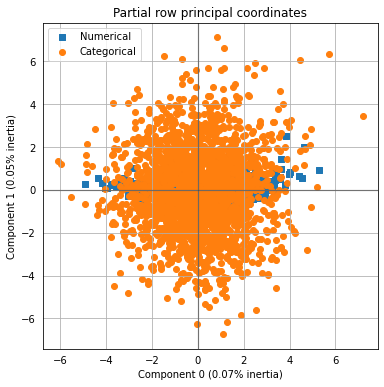

In [61]:
famd.plot_partial_row_coordinates(df, x_component=0, y_component=1)

In [71]:
coords["size"] = 0.001

In [72]:
px.scatter_3d(coords, x=0, y=1, z=2, size='size')